In [119]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures 

from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [120]:
data=pd.read_csv('kc_house_data.csv')
data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [121]:
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


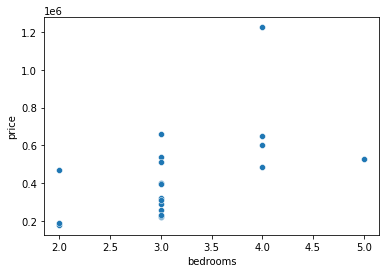

In [122]:
sns.scatterplot(x="bedrooms", y="price", data=data.head(20));

In [123]:
x=data["bedrooms"].values[:,np.newaxis]
y=data["price"].values

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=40) 

model=LinearRegression()   
model.fit(x_train,y_train)  
predicted=model.predict(x_test) 
MSE_LR=mean_squared_error(y_test,predicted)
R2_LR=metrics.r2_score(y_test,predicted)
print("MSE:", MSE_LR)
print("R squared:", R2_LR)
#R2 is too low
#MSE is too high

MSE: 113635389576.10474
R squared: 0.09610545961721939


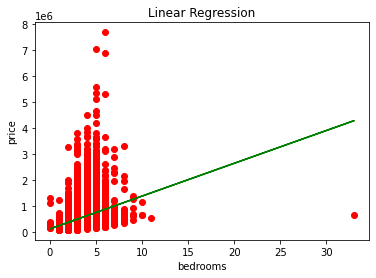

In [124]:
plt.scatter(x,y,color="r")
plt.title("Linear Regression")
plt.ylabel("price")
plt.xlabel("bedrooms")
plt.plot(x,model.predict(x),color="g")
plt.show()

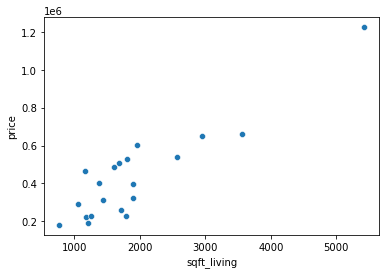

In [125]:
sns.scatterplot(x="sqft_living", y="price", data=data.head(20));

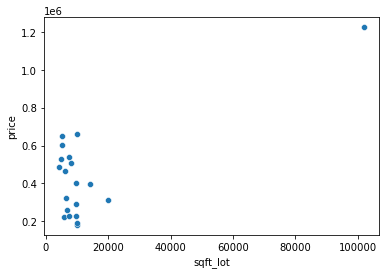

In [126]:
sns.scatterplot(x="sqft_lot", y="price", data=data.head(20));

In [127]:
l=[]
for i in data.index:
    l.append(data["sqft_living"][i]+data["sqft_lot"][i]+data["sqft_above"][i]+data["sqft_basement"][i]+data["sqft_living15"][i]+data["sqft_lot15"][i])
data["Surface"]=l

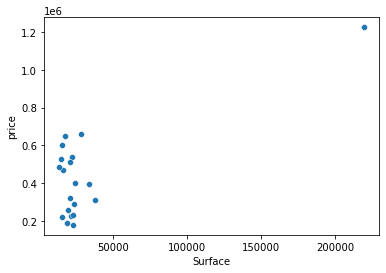

In [128]:
sns.scatterplot(x="Surface", y="price", data=data.head(20));

In [129]:
# Most Important Features are Surface and Bedrooms

In [130]:
x=data["Surface"].values[:,np.newaxis]
y=data["price"].values

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=40)
model=LinearRegression()   
model.fit(x_train,y_train)  
predicted=model.predict(x_test) 
MSE_LR_S=mean_squared_error(y_test,predicted)
R2_LR_S=metrics.r2_score(y_test,predicted)
print("MSE:", mean_squared_error(y_test,predicted))
print("R squared:", metrics.r2_score(y_test,predicted))
#R2 is too low
#MSE is too high

MSE: 124067162453.87914
R squared: 0.013127589906846926


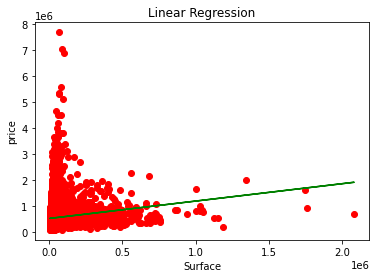

In [131]:
plt.scatter(x,y,color="r")
plt.title("Linear Regression")
plt.ylabel("price")
plt.xlabel("Surface")
plt.plot(x,model.predict(x),color="g")
plt.show()

In [132]:

x=data[["bedrooms","Surface"]]  
y=data["price"].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=40) 

model=LinearRegression() 
model.fit(x_train,y_train) 
predicted=model.predict(x_test) 
MSE_MLR=mean_squared_error(y_test,predicted)
R2_MLR=metrics.r2_score(y_test,predicted)
print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))
if MSE_MLR < MSE_LR_S and MSE_MLR < MSE_LR:
    print("MSE in multi-linear regression has gotten lower")
if R2_MLR > R2_LR_S and R2_MLR > R2_LR:
    print("R2 in multi-linear regression has gotten higher")
# R2 is still too low
# MSE is still too high

MSE 110243369302.0903
R squared 0.12364420920571728
MSE in multi-linear regression has gotten lower
R2 in multi-linear regression has gotten higher


In [133]:
x=data[["bedrooms","Surface"]]  
y=data["price"].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=40)  
lg=LinearRegression()
poly=PolynomialFeatures(degree=3)

x_train_fit = poly.fit_transform(x_train) 
lg.fit(x_train_fit, y_train)
x_test_ = poly.fit_transform(x_test)
predicted = lg.predict(x_test_)
MSE_PR=mean_squared_error(y_test,predicted)
R2_PR=metrics.r2_score(y_test,predicted)
print("MSE: ", metrics.mean_squared_error(y_test, predicted))
print("R squared: ", metrics.r2_score(y_test,predicted))
if MSE_PR < MSE_MLR:
    print("MSE in Polynomial regression has gotten lower")
if R2_PR > R2_MLR:
    print("R2 in Polynomial regression has gotten higher")

MSE:  109725936965.08437
R squared:  0.12775742551750124
MSE in Polynomial regression has gotten lower
R2 in Polynomial regression has gotten higher


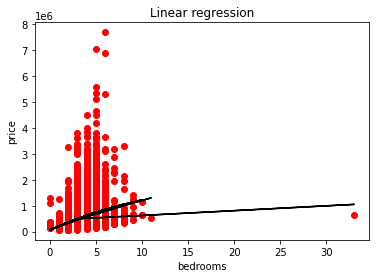

In [134]:
x= data["bedrooms"].values.reshape(-1,1)
y= data["price"].values
poly = PolynomialFeatures(degree = 2) 
x_poly = poly.fit_transform(x) 
poly.fit(x_poly, y) 
lg=LinearRegression()
lg.fit(x_poly, y) 

plt.scatter(x, y, color="r")
plt.title("Linear regression")
plt.ylabel("price")
plt.xlabel("bedrooms")
plt.plot(x, lg.predict(poly.fit_transform(x)), color="k") 

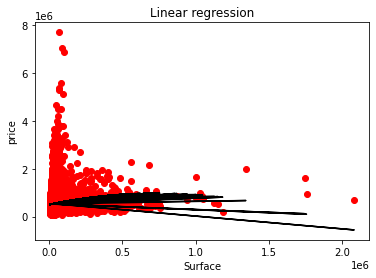

In [135]:
x= data["Surface"].values.reshape(-1,1)
y= data["price"].values
poly = PolynomialFeatures(degree = 2) 
x_poly = poly.fit_transform(x) 
poly.fit(x_poly, y) 
lg=LinearRegression()
lg.fit(x_poly, y) 

plt.scatter(x, y, color="r")
plt.title("Linear regression")
plt.ylabel("price")
plt.xlabel("Surface")
plt.plot(x, lg.predict(poly.fit_transform(x)), color="k") 